In [63]:
from basic_Nab_analysis import *
import basicFunctions as bf
%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 5]

In [37]:
fileDir = "/Users/leenderthayen/git/NDP/data/UoM/bias_scan_single/"
figDir = "/Users/leenderthayen/git/NDP/analysis/figures/"

tempFiles = ["Run-420_0  Cd109_Vb=-50V/temperature_420_0.csv", 
             "Run-416_1 Cd109_Vb=-75V/temperature_416_1.csv", 
             "Run-417_0 Cd109_Vb=-90V/temperature_417_0.csv",
             "Run-418_0  Cd109_Vb=-120V/temperature_418_0.csv",
             "Run-419_0  Cd109_Vb=-150V/temperature_419_0.csv"]

biasFiles = ["Run-420_0  Cd109_Vb=-50V/biascurrent_420_0.csv", 
             "Run-416_1 Cd109_Vb=-75V/biascurrent_416_1.xlsx", 
             "Run-417_0 Cd109_Vb=-90V/biascurrent_417_0.csv",
             "Run-418_0  Cd109_Vb=-120V/biascurrent_418_0.csv",
             "Run-419_0  Cd109_Vb=-150V/biascurrent_419_0.csv"]

scopeFiles = ["Run-420_0  Cd109_Vb=-50V/ScopeRun420_0-004.scope", 
              "Run-416_1 Cd109_Vb=-75V/ScopeRun416_1-002.scope", 
              "Run-417_0 Cd109_Vb=-90V/ScopeRun417_0-003.scope", 
              "Run-418_0  Cd109_Vb=-120V/ScopeRun418_0-006.scope", 
              "Run-419_0  Cd109_Vb=-150V/ScopeRun419_0-005.scope"]
mappingFile = "PixelFetPreampMapManitoba6-16-2021.csv"

In [7]:
tempDict = dict()
biasDict = dict()
V = [50, 75, 90, 120, 150]
for i in range(len(tempFiles)):
    tempDict[V[i]] = loadTemperatureData(fileDir + tempFiles[i])
    biasDict[V[i]] = loadBiasCurrentData(fileDir + biasFiles[i])

In [8]:
tempDict[V[0]].info()
biasDict[V[0]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7387 entries, 0 to 7386
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Detector        7387 non-null   float64       
 1   FET S           7387 non-null   float64       
 2   FET N           7387 non-null   float64       
 3   Ring            7387 non-null   float64       
 4   Preamp          7387 non-null   float64       
 5   Abs time        7387 non-null   float64       
 6   Time stamp 12h  7387 non-null   datetime64[ns]
 7   Date            7387 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(6)
memory usage: 461.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15459 entries, 0 to 15458
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Bias status       15459 non-null  int64         
 1   Nominal bias      15459 non-null  floa

<IPython.core.display.Javascript object>


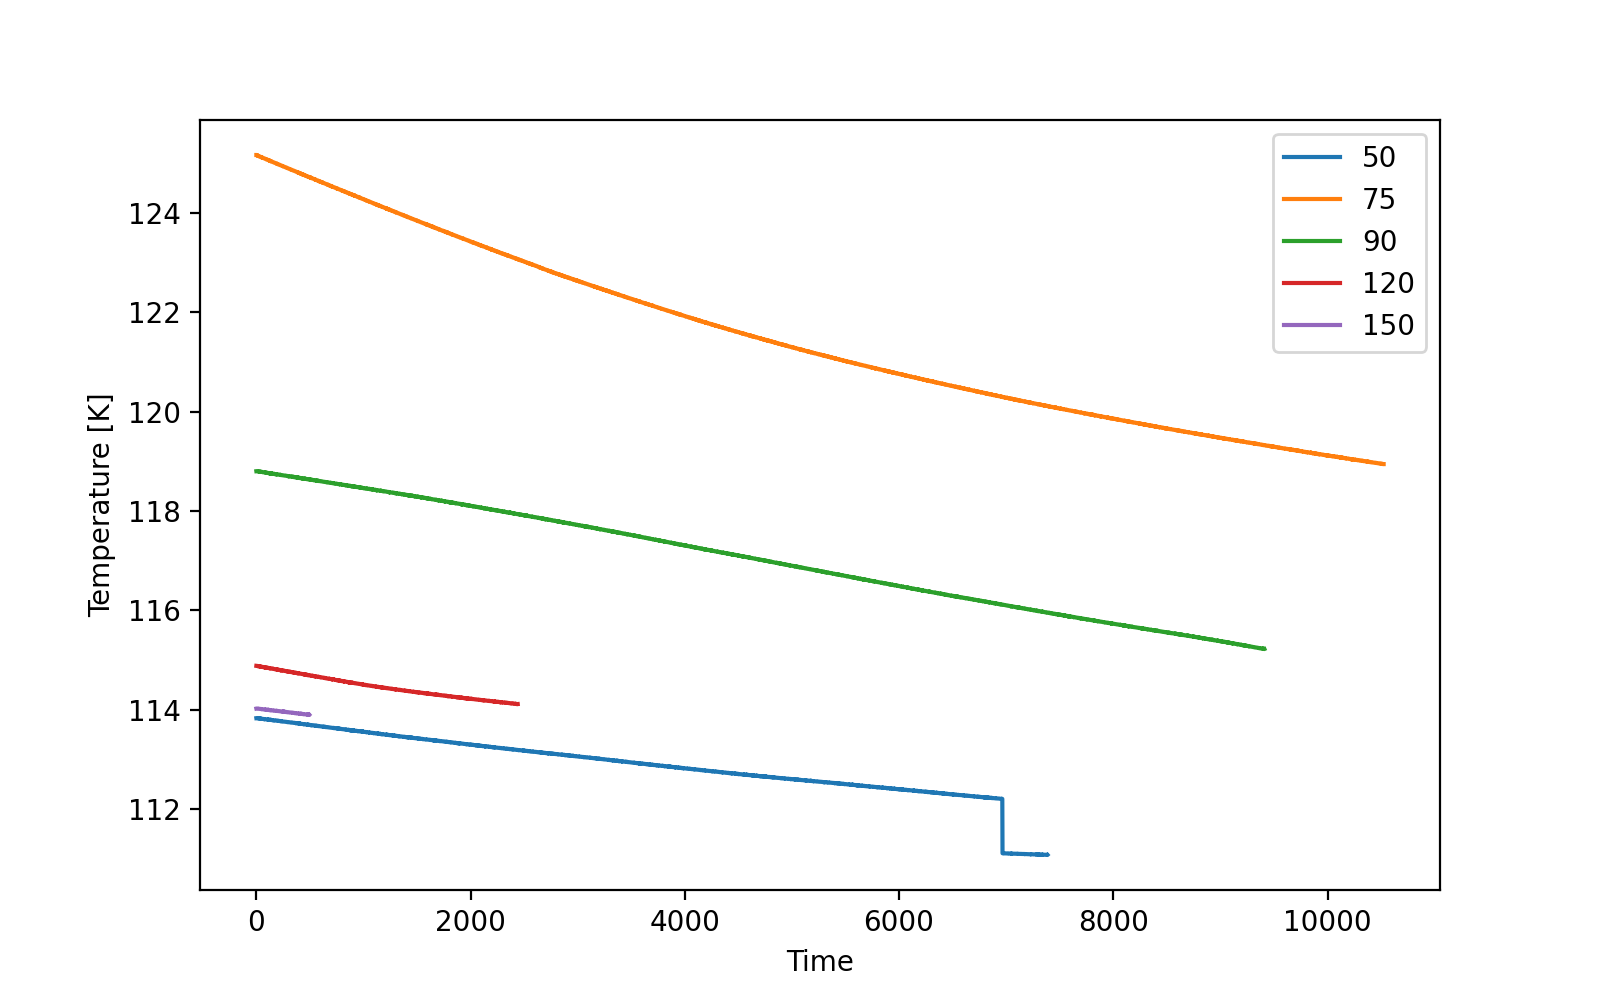

In [64]:
plt.figure()
for v in V:
    plt.plot(tempDict[v]["Detector"]+273, label=v)
plt.xlabel("Time")
plt.ylabel("Temperature [K]")
plt.legend(loc=0)

<IPython.core.display.Javascript object>


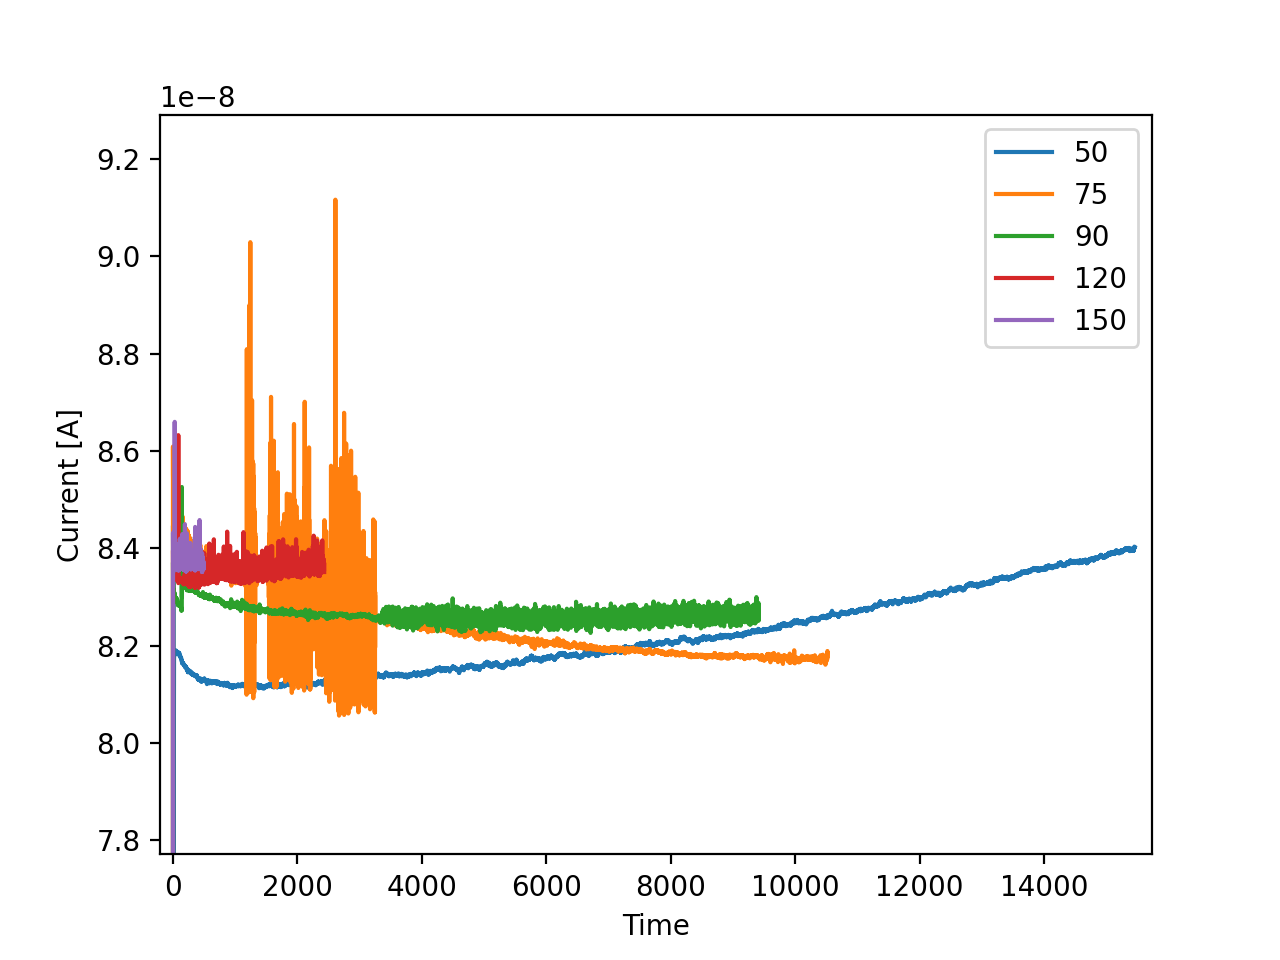

In [11]:
plt.figure()
for v in V:
    plt.plot(biasDict[v]["Detector current"], label=v)
plt.xlabel("Time")
plt.ylabel("Current [A]")
plt.legend(loc=0)

In [51]:
pixelMappingDF = pd.read_csv(fileDir + mappingFile, na_values=[""])
pixelMappingDF.fillna(-1, axis=1, inplace=True)
pixelMappingDF.info()
pixelMappingDF["bc"] = 8*pixelMappingDF["Board"] + pixelMappingDF["Channel"]
pixelMappingDF.sort_values("Pixel Number", inplace=True)
pixelMappingDF.head(10)

pixelMapping = np.zeros(127, dtype=[('bc', np.int32), ('pixel', np.int32)])
for index, row in pixelMappingDF.iterrows():
    if row['Pixel Number'] != -1:
        pixelMapping[int(row['Pixel Number'])-1] = row['bc'], row['Pixel Number']
print(pixelMapping)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pixel Number    132 non-null    float64
 1   FET Card        132 non-null    object 
 2   Preamp Channel  132 non-null    object 
 3   Board           132 non-null    float64
 4   Channel         132 non-null    float64
dtypes: float64(3), object(2)
memory usage: 5.3+ KB
[( 67,   1) ( 75,   2) ( 73,   3) ( 74,   4) ( 81,   5) ( 79,   6)
 ( 89,   7) ( 69,   8) ( 68,   9) ( 80,  10) ( 72,  11) ( 83,  12)
 ( 87,  13) ( 91,  14) ( 93,  15) ( 61,  16) ( 66,  17) ( 65,  18)
 ( 70,  19) ( 71,  20) ( 78,  21) ( 98,  22) ( 96,  23) ( -9,  24)
 ( 57,  25) ( 58,  26) ( 64,  27) ( 59,  28) ( 88,  29) ( 86,  30)
 ( 84,  31) ( 90,  32) ( -9,  33) ( 95,  34) ( 53,  35) ( 63,  36)
 ( 62,  37) ( 52,  38) ( 77,  39) ( 82,  40) ( 92,  41) ( 99,  42)
 ( -9,  43) ( 94,  44) ( -9,  45) ( 49,  46) ( 55,  47) ( 48

In [14]:
scopeDict = dict()
cuts = []
for i in range(len(scopeFiles)):
    scopeDict[V[i]] = analyseWFFiles(fileDir + scopeFiles[i], cuts)

INFO:root:Entering analyseWFFiles for file(s):/Users/leenderthayen/git/NDP/data/UoM/bias_scan_single/Run-420_0  Cd109_Vb=-50V/ScopeRun420_0-004.scope


[[17, 19, 20, 21], array([3, 2, 3, ..., 1, 1, 1]), array([63828, 51625, 25478, 43696])]


100%|██████████| 9/9 [02:32<00:00, 16.94s/it]
INFO:root:Energy timing done
INFO:root:Entering analyseWFFiles for file(s):/Users/leenderthayen/git/NDP/data/UoM/bias_scan_single/Run-416_1 Cd109_Vb=-75V/ScopeRun416_1-002.scope


[[17, 18, 19, 20, 21, 22], array([5, 3, 3, ..., 3, 4, 3]), array([44155, 21018, 33323, 29238, 29590, 17626])]


100%|██████████| 8/8 [01:54<00:00, 14.32s/it]
INFO:root:Energy timing done
INFO:root:Entering analyseWFFiles for file(s):/Users/leenderthayen/git/NDP/data/UoM/bias_scan_single/Run-417_0 Cd109_Vb=-90V/ScopeRun417_0-003.scope


[[17, 18, 19, 20, 21, 22], array([5, 4, 4, ..., 0, 3, 0]), array([34524, 24176, 31202, 32638, 30664, 21488])]


100%|██████████| 8/8 [01:49<00:00, 13.71s/it]
INFO:root:Energy timing done
INFO:root:Entering analyseWFFiles for file(s):/Users/leenderthayen/git/NDP/data/UoM/bias_scan_single/Run-418_0  Cd109_Vb=-120V/ScopeRun418_0-006.scope


[[17, 18, 19, 20, 21, 22], array([2, 3, 4, ..., 4, 3, 5]), array([21318, 84580, 72393, 61003, 86614, 83498])]


100%|██████████| 20/20 [04:49<00:00, 14.47s/it]
INFO:root:Energy timing done
INFO:root:Entering analyseWFFiles for file(s):/Users/leenderthayen/git/NDP/data/UoM/bias_scan_single/Run-419_0  Cd109_Vb=-150V/ScopeRun419_0-005.scope


[[17, 18, 19, 20, 21, 22], array([2, 5, 1, ..., 1, 4, 4]), array([21282, 61426, 54397, 46237, 62178, 60851])]


100%|██████████| 15/15 [03:49<00:00, 15.29s/it]
INFO:root:Energy timing done


In [66]:
wfData = scopeDict[V[-1]][0]
hits = np.zeros(127)
bcsHits = wfData.bcs
i = 0
for bc in bcsHits[0]:
    pixel = pixelMapping['pixel'][pixelMapping['bc']==bc]
    hits[pixel-1] = bcsHits[-1][i]
    i += 1

<IPython.core.display.Javascript object>


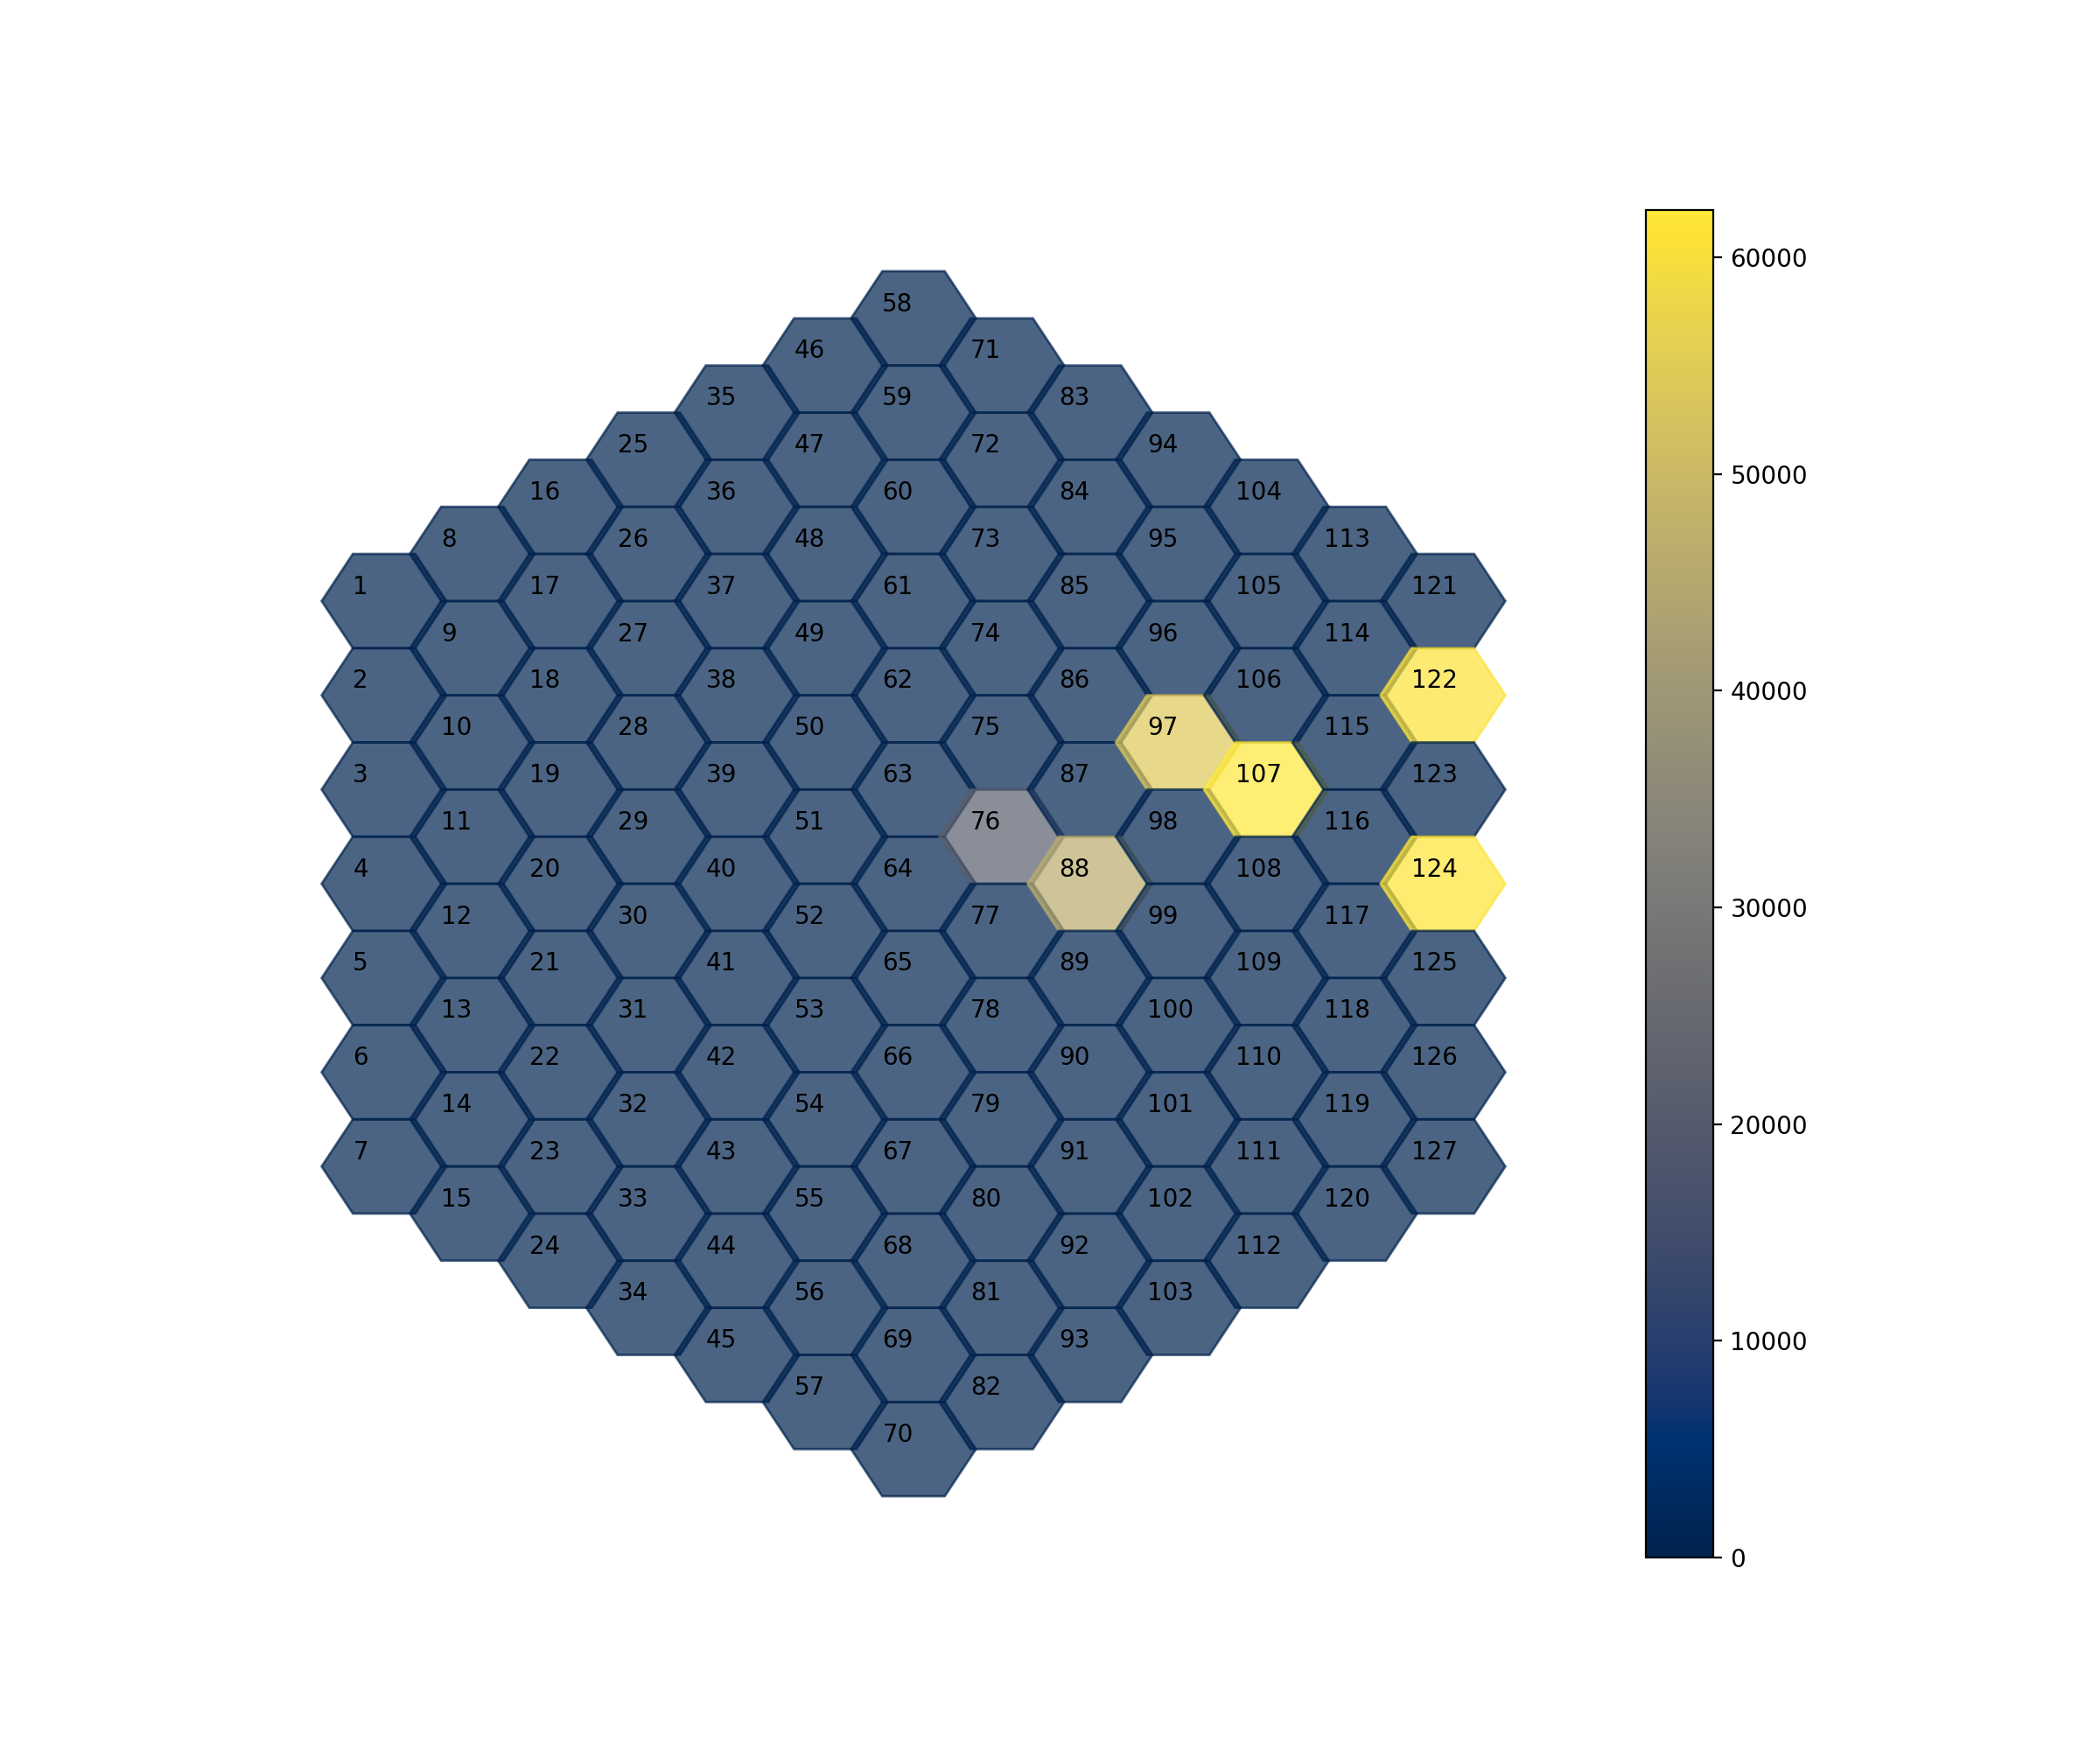

In [67]:
bf.plotOneDetector(hits, alpha=0.7, showVal = True)

In [16]:
bcs = np.arange(17, 23)
histDict = dict()
bins = np.arange(0, 200, 0.2)
for v in V:
    results = scopeDict[v][-1]
    hists = np.zeros((len(bcs), len(bins)-1))
    i = 0
    for bc in bcs:
        results.resetCuts()
        results.defineCut('bc', '=', bc)
        results.defineCut('t0', 'between', 3000, 4000)
        hist, _ = np.histogram(results.data()['energy'], bins=bins)
        hists[i, :] = hist
        i += 1
    histDict[v] = hists

<IPython.core.display.Javascript object>


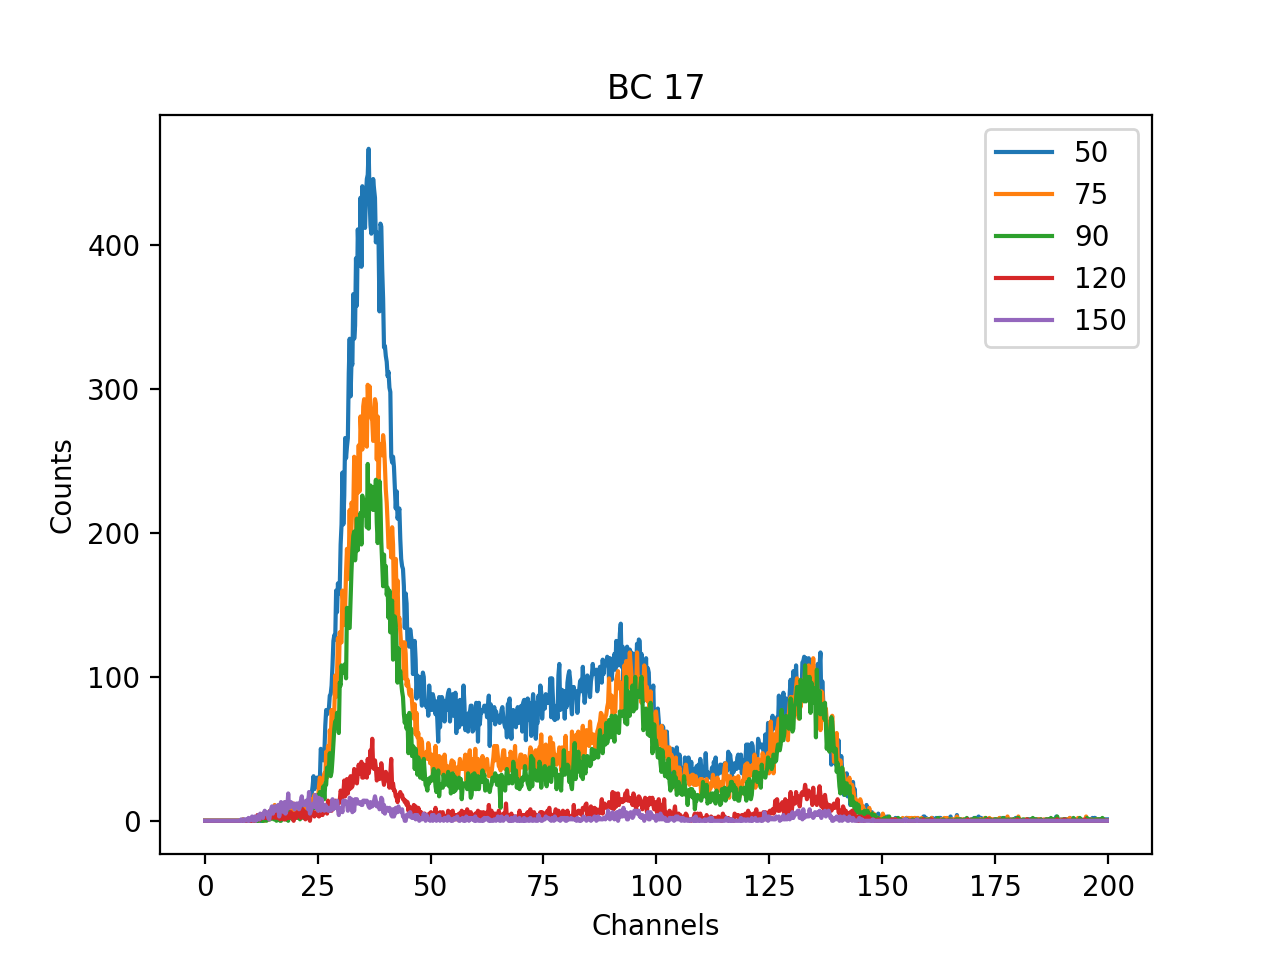

<IPython.core.display.Javascript object>


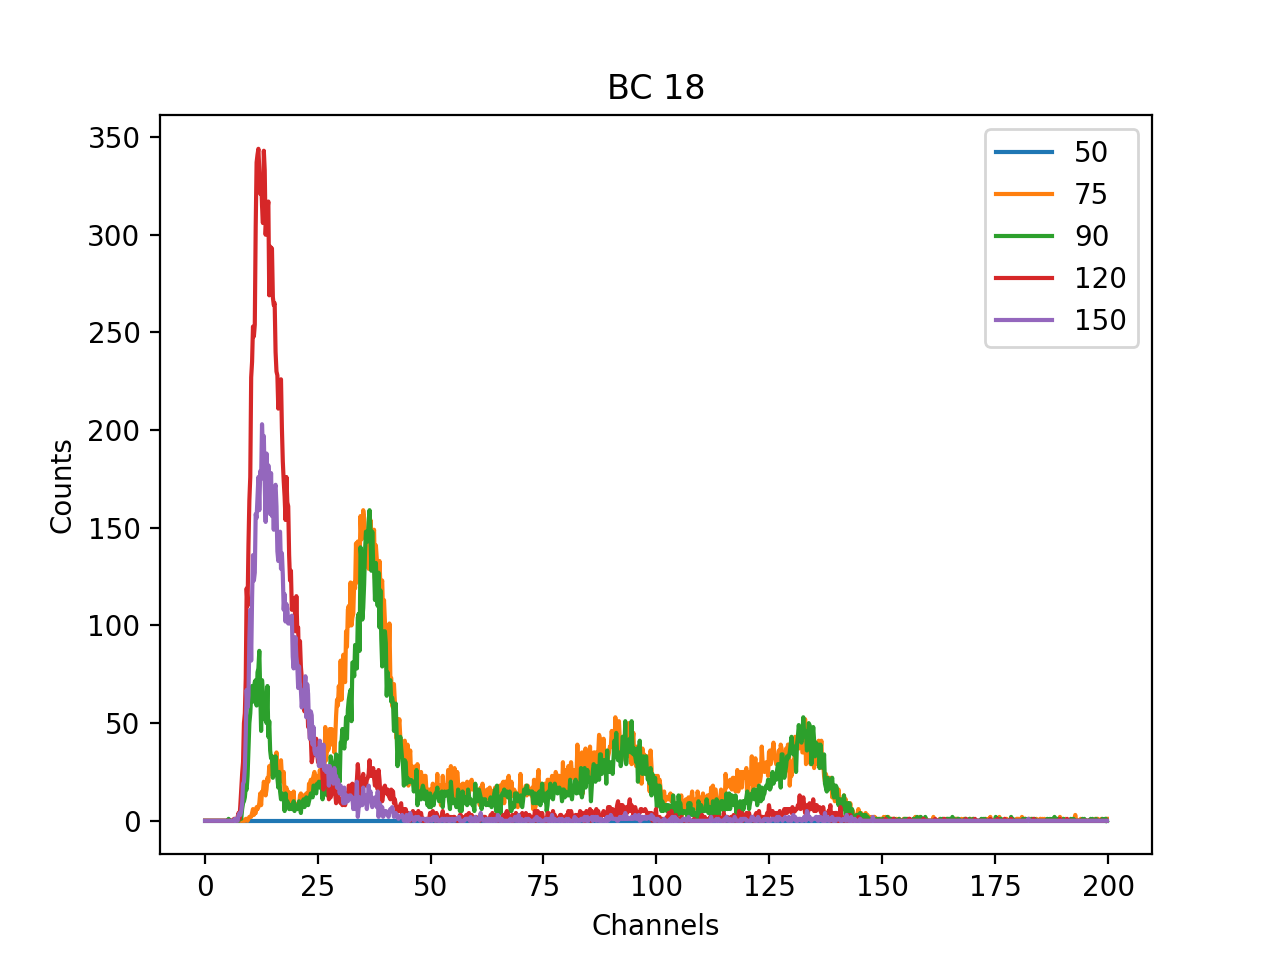

<IPython.core.display.Javascript object>


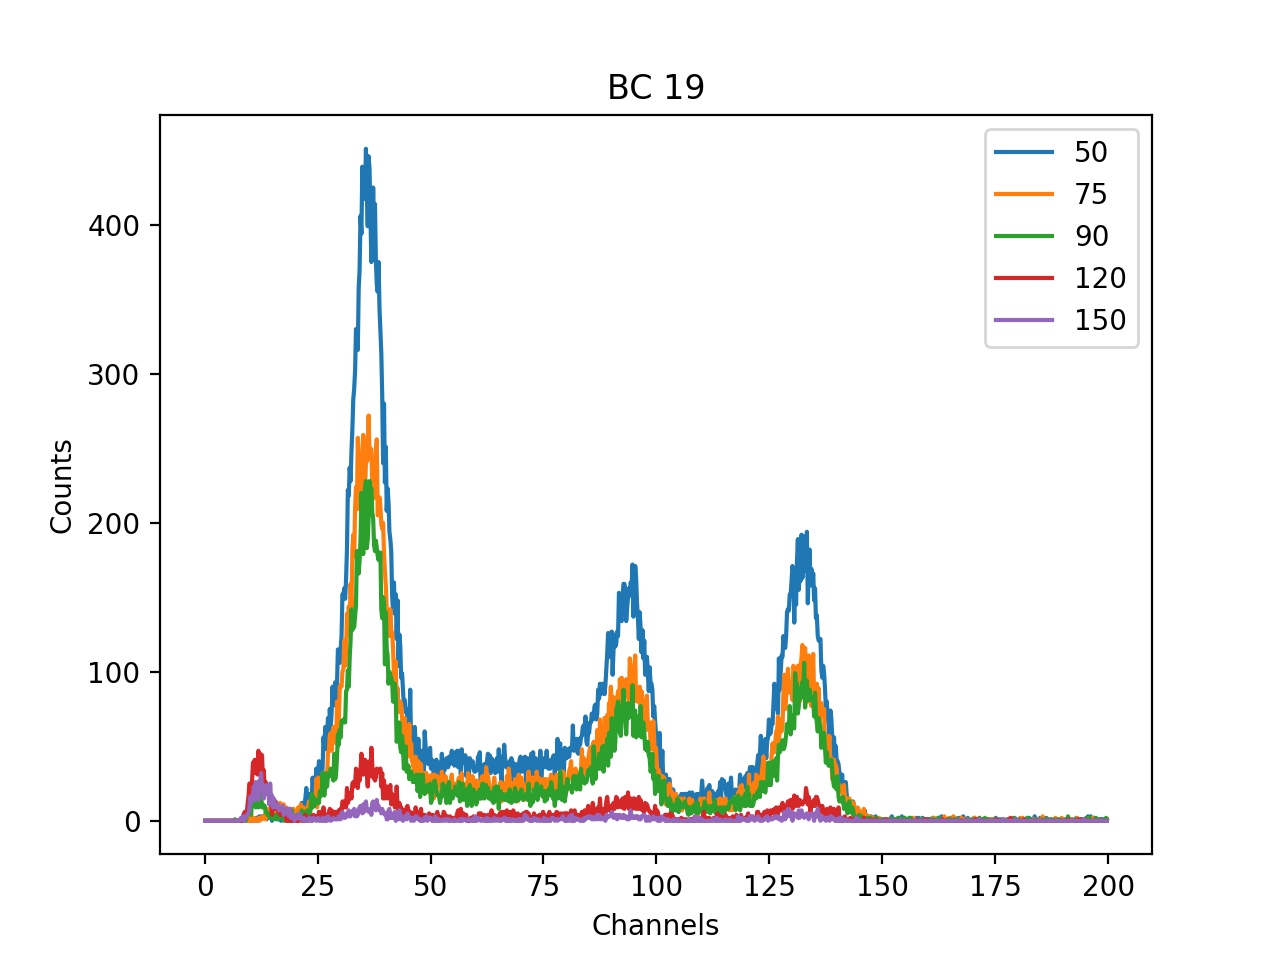

<IPython.core.display.Javascript object>


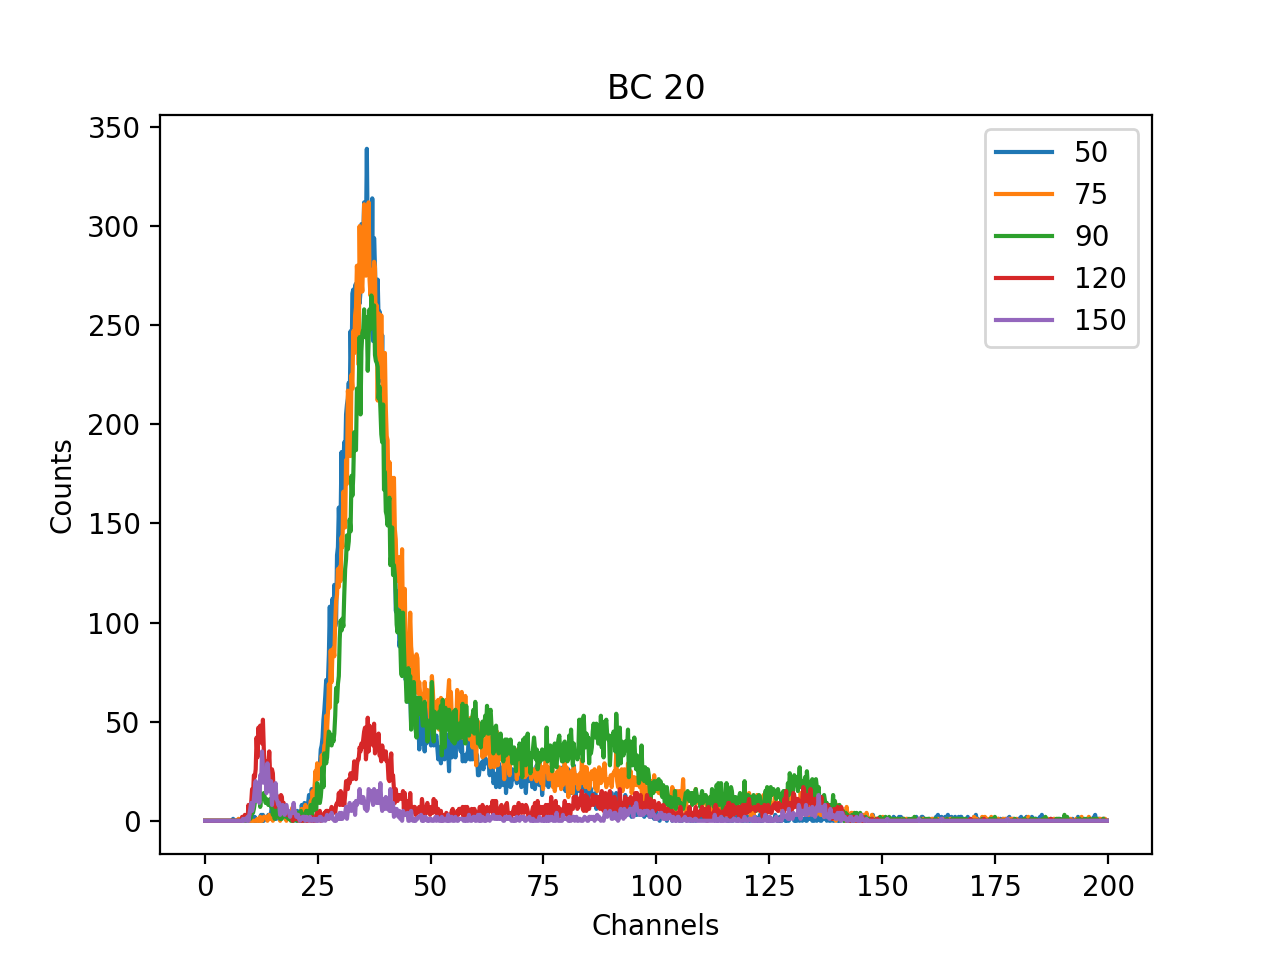

<IPython.core.display.Javascript object>


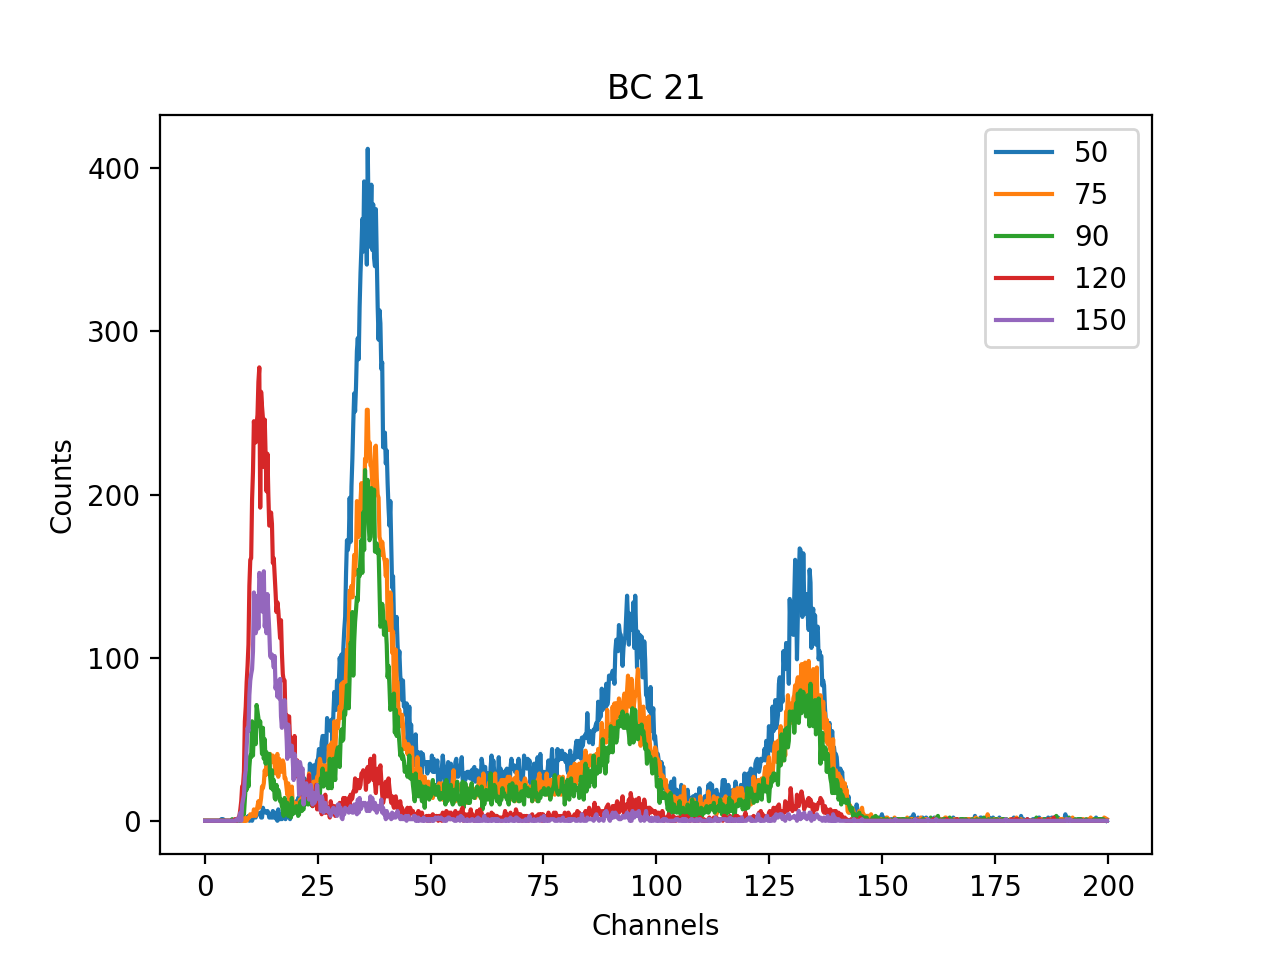

<IPython.core.display.Javascript object>


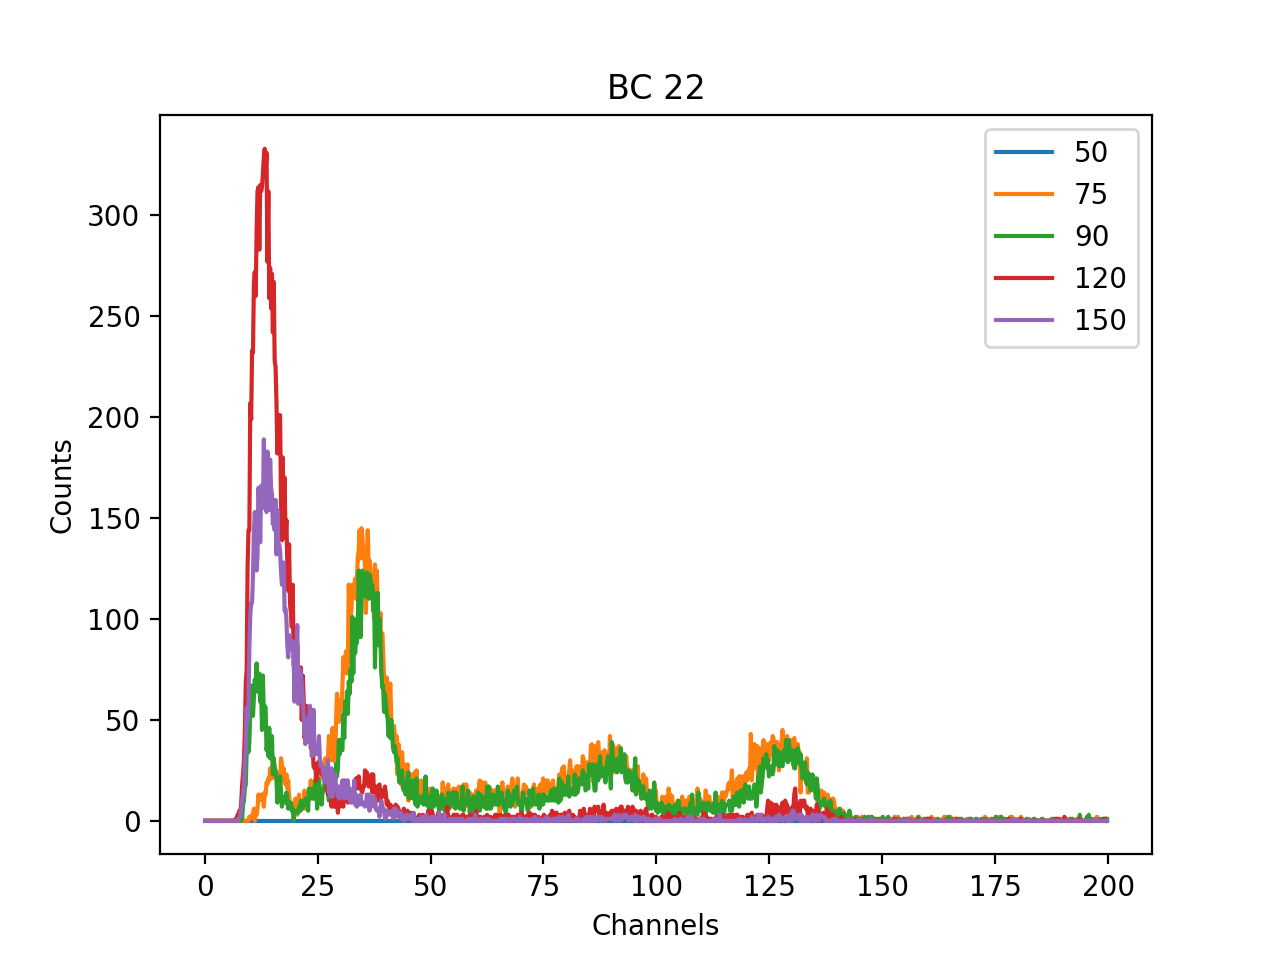

In [36]:
i = 0
for bc in bcs:
    plt.figure()
    plt.title("BC %d" % bc)
    plt.xlabel("Channels")
    plt.ylabel("Counts")
    for v in V:
        hist = histDict[v][i, :]
        plt.plot(bins[:-1]+0.1, hist, label=v)
    #plt.yscale("log")
    plt.legend(loc=0)
    #plt.savefig(figDir + "bias_scan_bc_%d.png" % bc)
    i += 1

INFO:root:Fitting peaks for results <resultFileClass.resultFile object at 0x1c3b506d0> for channel 19


<IPython.core.display.Javascript object>


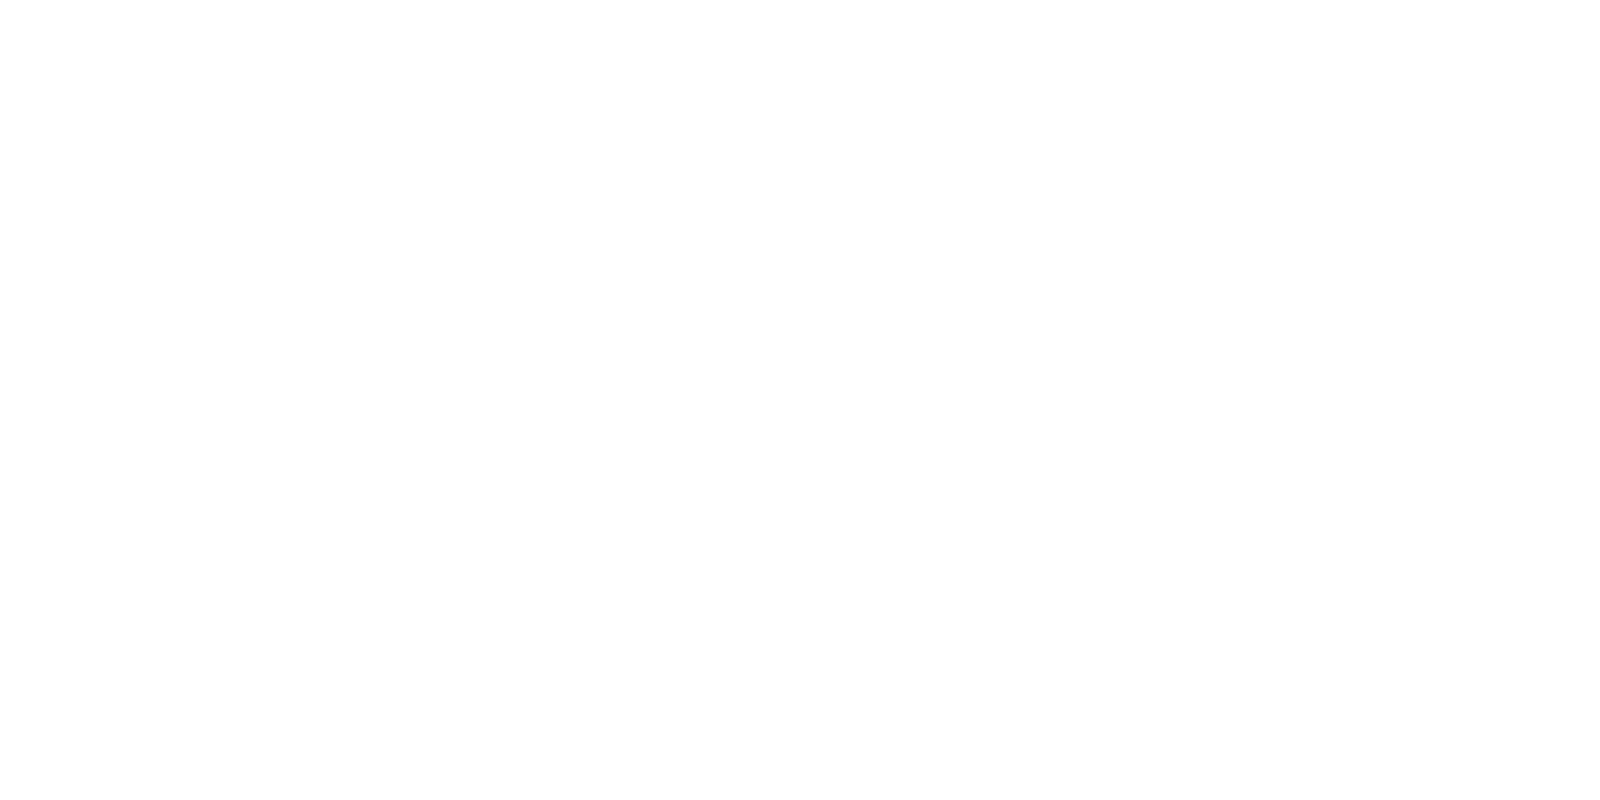

0 [15.600000000000001, 55.6]
200 37.07395313425261 6.077867115350439
<lmfit.Model: (((Model(gauss, prefix='g_') + Model(stepFunc, prefix='st_')) + Model(lowerExponential, prefix='le_')) + Model(linearBG))>
Zeros in Errs (array([], dtype=int64),)
Starting minimisation...


/Users/leenderthayen/git/NDP/analysis/utils/fitFunctions.py:46: RuntimeWarning: overflow encountered in power
  return lowexp1*np.exp(lowexp2*tt)/(1+np.exp(tt))**4.0


[[Model]]
    (((Model(gauss, prefix='g_') + Model(stepFunc, prefix='st_')) + Model(lowerExponential, prefix='le_')) + Model(linearBG))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 200
    # variables        = 8
    chi-square         = 2610.86557
    reduced chi-square = 13.5982582
    Akaike info crit   = 529.823943
    Bayesian info crit = 556.210482
[[Variables]]
    g_a:          326.579075 +/- 242.699805 (74.32%) (init = 286.56)
    g_x0:         36.2419573 +/- 1.31214293 (3.62%) (init = 37.07395)
    g_sigma:      4.46496875 +/- 0.36784828 (8.24%) (init = 6.077867)
    st_x0:        36.2419573 +/- 1.31214293 (3.62%) == 'g_x0'
    st_sigma:     4.46496875 +/- 0.36784828 (8.24%) == 'g_sigma'
    st_stepSize:  11.1588719 +/- 75.0178827 (672.27%) (init = 10)
    le_x0:        36.2419573 +/- 1.31214293 (3.62%) == 'g_x0'
    le_sigma:     4.46496875 +/- 0.36784828 (8.24%) == 'g_sigma'
    le_lowexp1:   8.1916e-04 +/- 3933.618

<IPython.core.display.Javascript object>


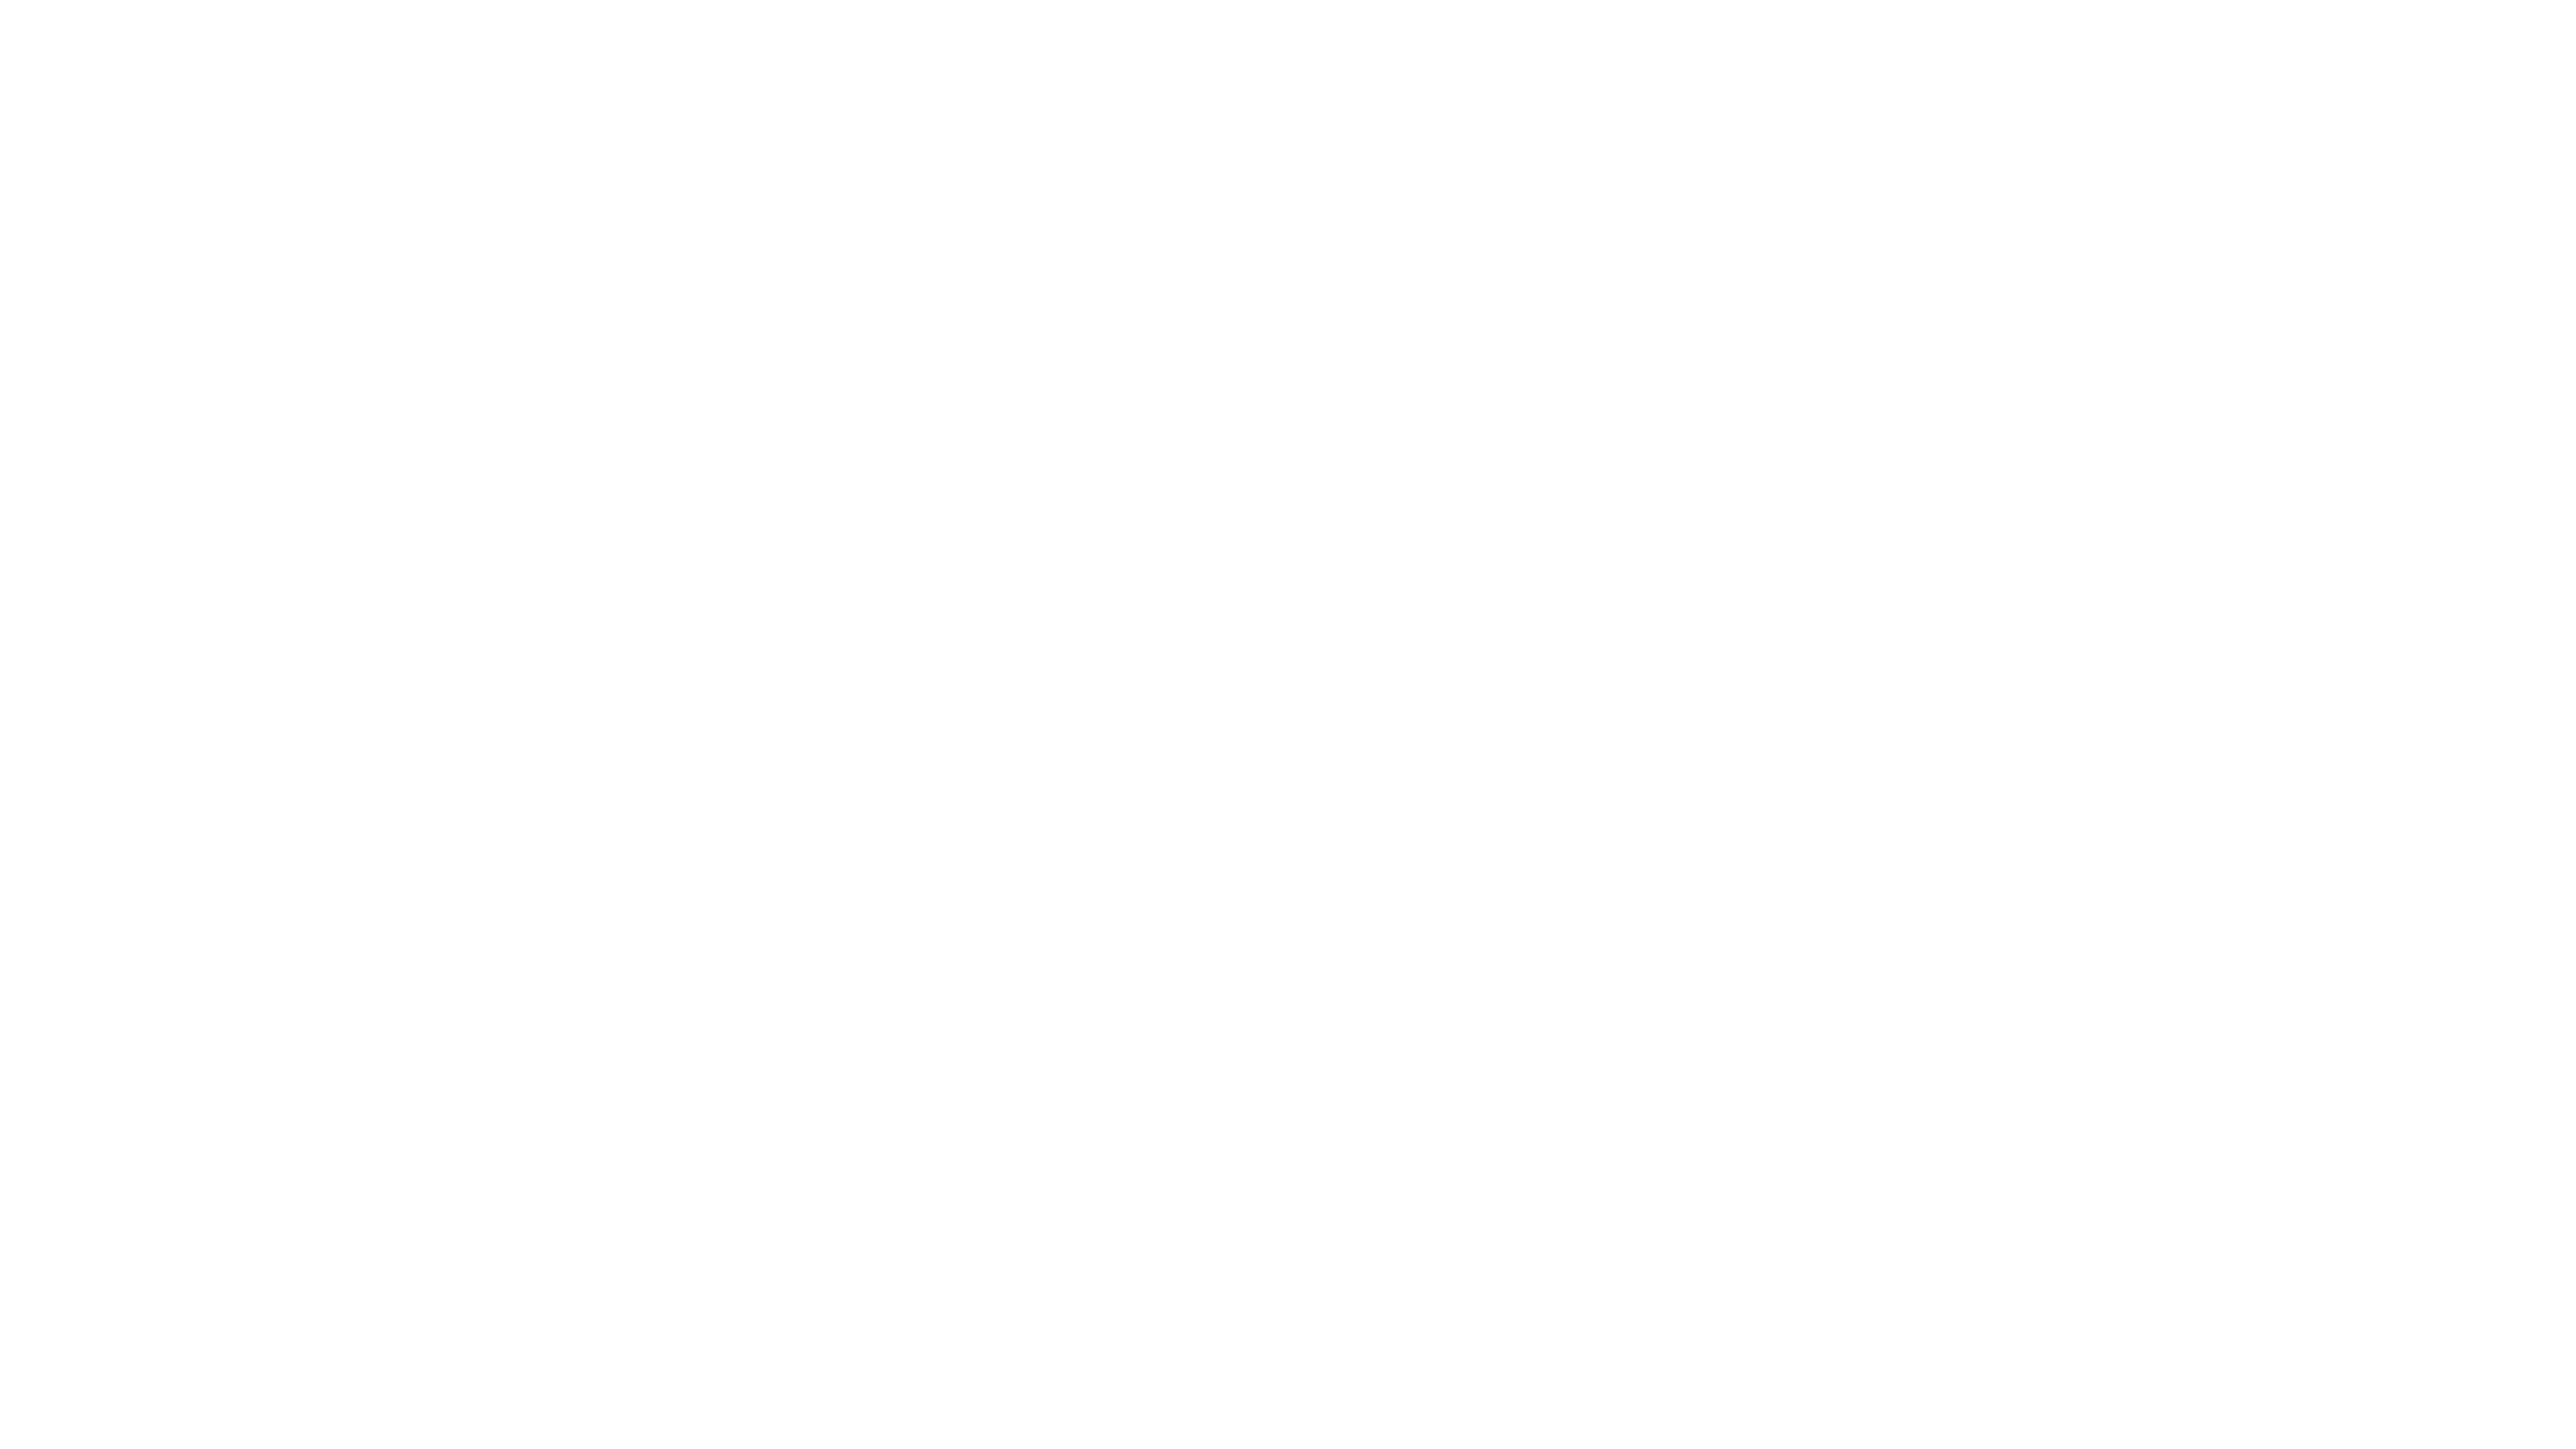

2
The relative error between two consecutive iterates is at most 0.000000
Fit succeeded.
[<Figure size 1600x900 with 2 Axes>]
1 [74.60000000000001, 114.60000000000001]
200 92.02435803969223 8.16505651399106
<lmfit.Model: (((Model(gauss, prefix='g_') + Model(stepFunc, prefix='st_')) + Model(lowerExponential, prefix='le_')) + Model(linearBG))>
Zeros in Errs (array([], dtype=int64),)
Starting minimisation...


/Users/leenderthayen/git/NDP/analysis/utils/fitFunctions.py:46: RuntimeWarning: overflow encountered in power
  return lowexp1*np.exp(lowexp2*tt)/(1+np.exp(tt))**4.0
/Users/leenderthayen/git/NDP/analysis/utils/fitFunctions.py:42: RuntimeWarning: overflow encountered in square
  return stepSize/(1.0+np.exp(tt))**2.0


[[Model]]
    (((Model(gauss, prefix='g_') + Model(stepFunc, prefix='st_')) + Model(lowerExponential, prefix='le_')) + Model(linearBG))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 172
    # data points      = 200
    # variables        = 8
    chi-square         = 189.568526
    reduced chi-square = 0.98733607
    Akaike info crit   = 5.28664108
    Bayesian info crit = 31.6731800
[[Variables]]
    g_a:          121.952216 +/- 9.82961570 (8.06%) (init = 93.92)
    g_x0:         94.8679662 +/- 0.33625108 (0.35%) (init = 92.02436)
    g_sigma:      3.41343662 +/- 0.17048412 (4.99%) (init = 8.165057)
    st_x0:        94.8679662 +/- 0.33625108 (0.35%) == 'g_x0'
    st_sigma:     3.41343662 +/- 0.17048412 (4.99%) == 'g_sigma'
    st_stepSize:  17.6382300 +/- 9.24245683 (52.40%) (init = 10)
    le_x0:        94.8679662 +/- 0.33625108 (0.35%) == 'g_x0'
    le_sigma:     3.41343662 +/- 0.17048412 (4.99%) == 'g_sigma'
    le_lowexp1:   234.797126 +/- 87.0260749

<IPython.core.display.Javascript object>


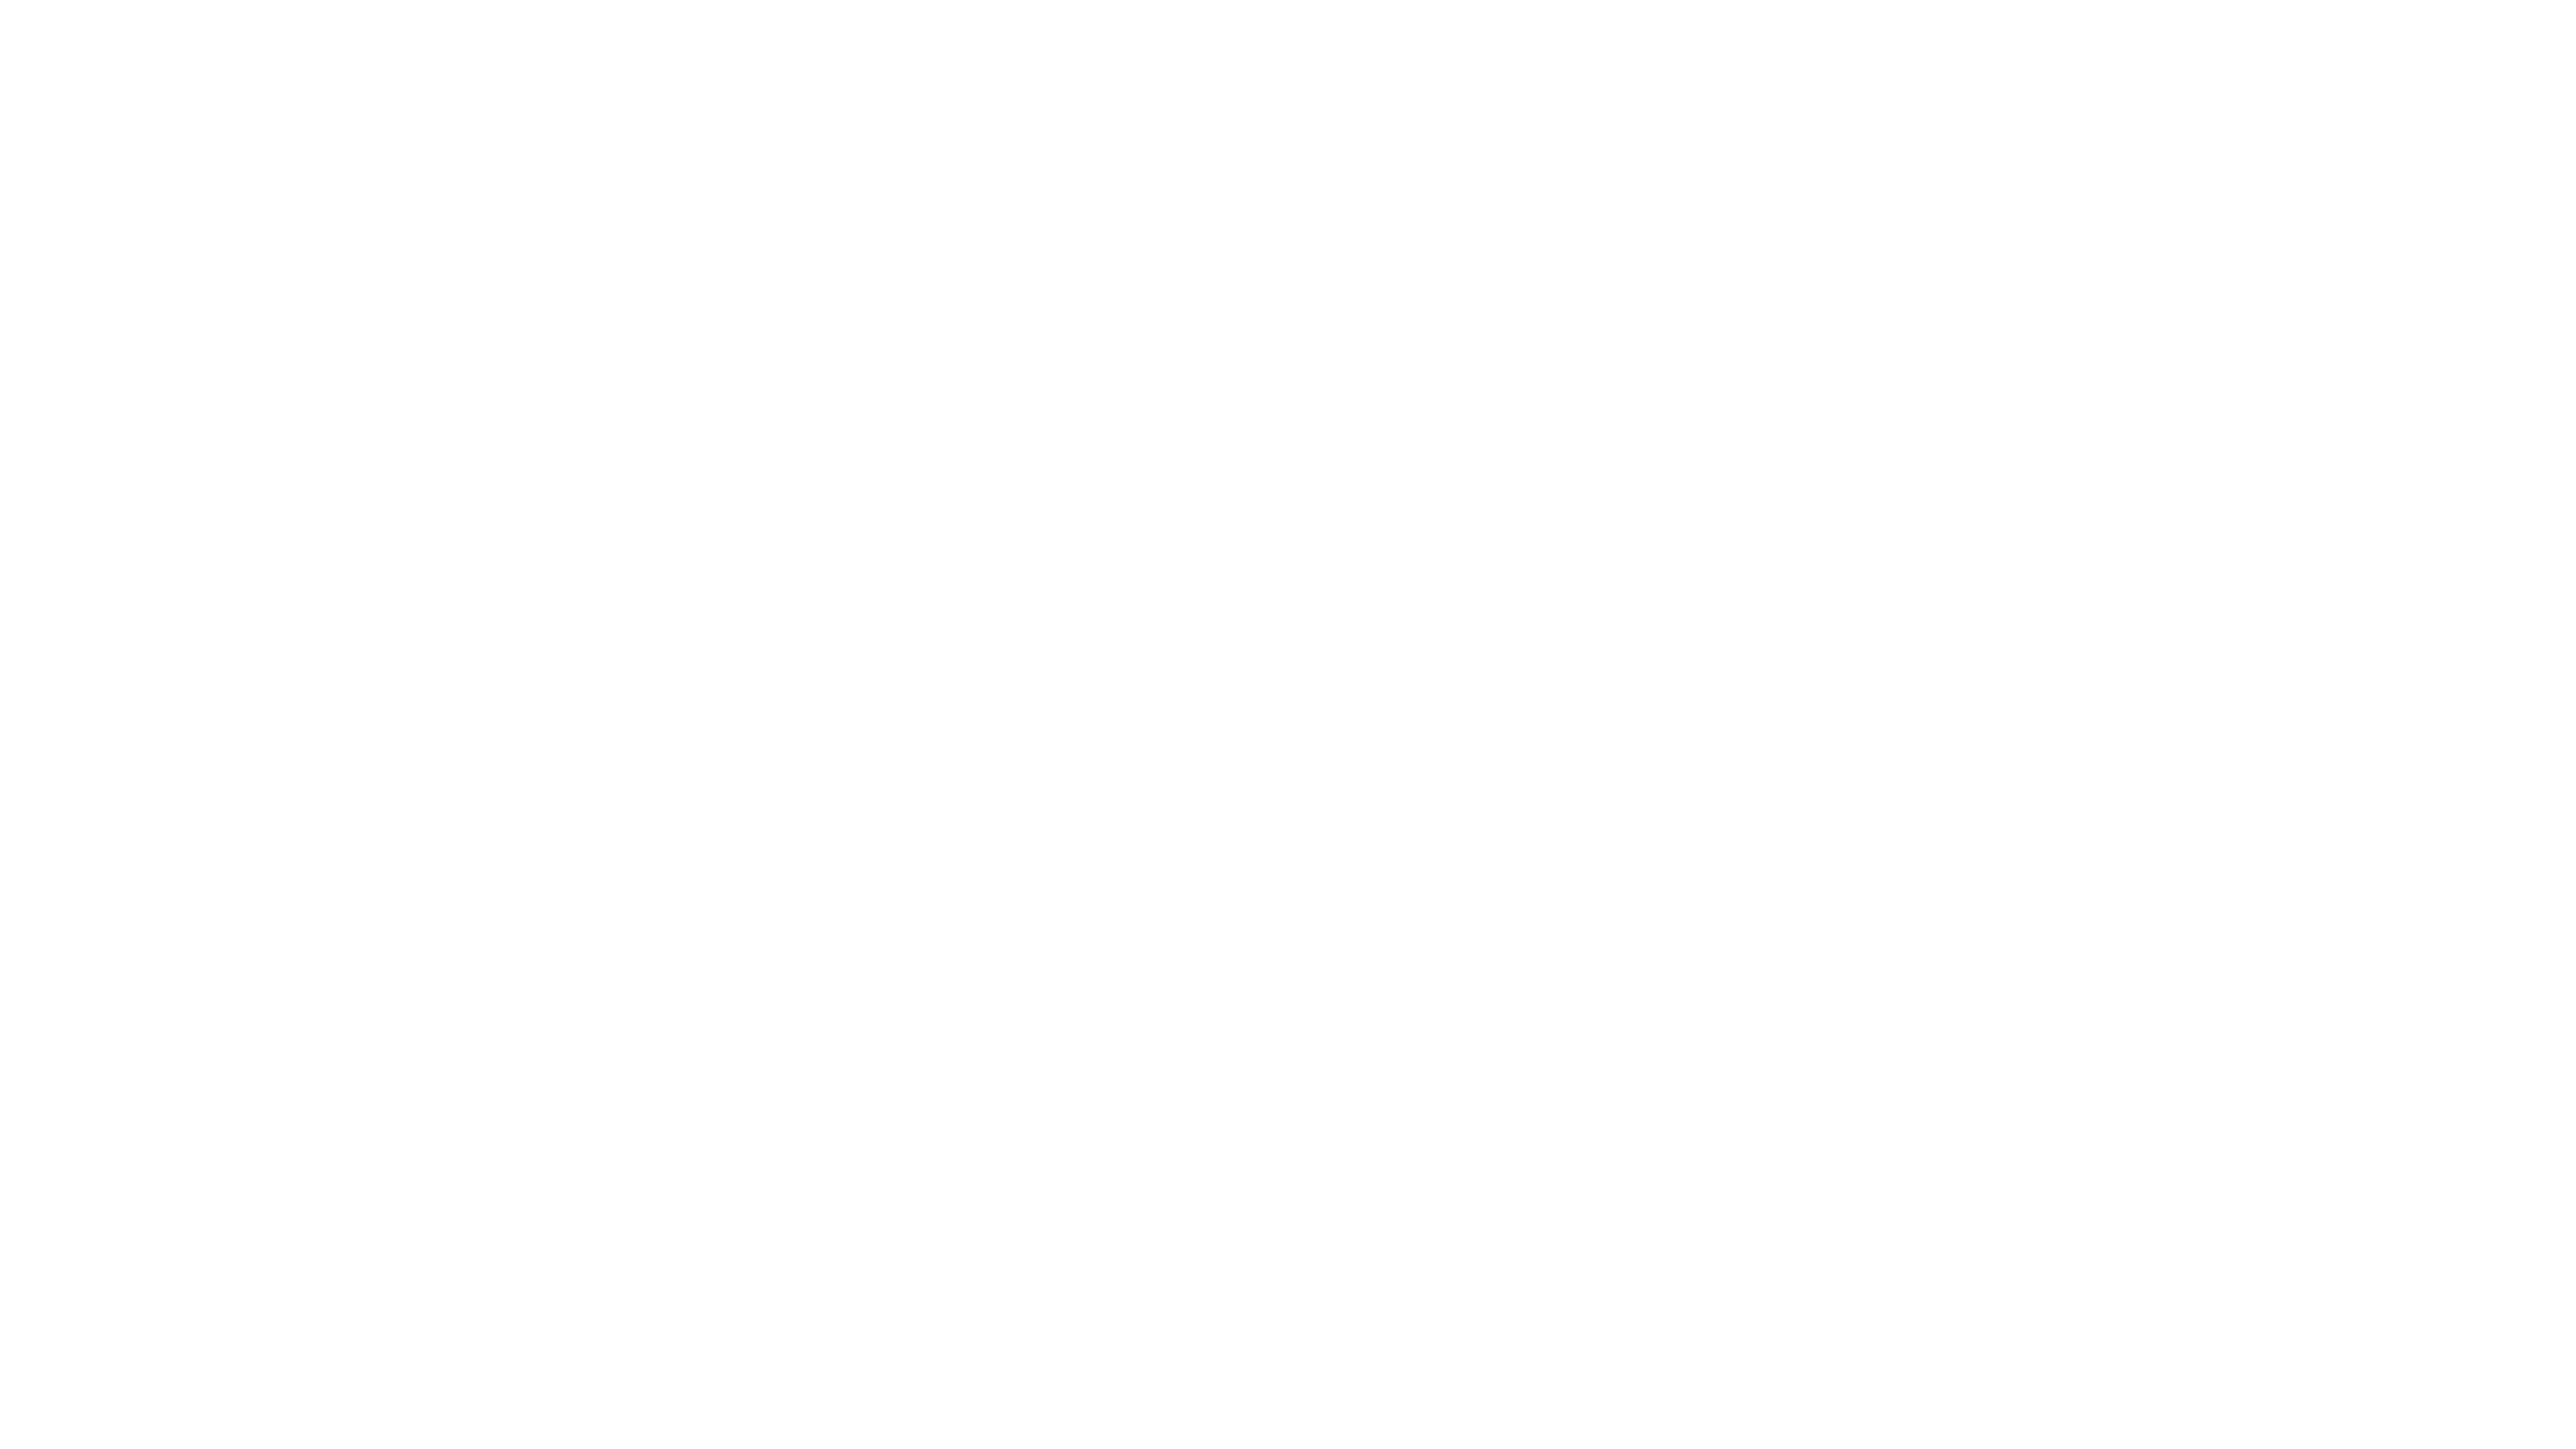

2
The relative error between two consecutive iterates is at most 0.000000
Fit succeeded.
[<Figure size 1600x900 with 2 Axes>]
2 [113.2, 153.20000000000002]
200 130.78871255349503 6.077549327795084
<lmfit.Model: (((Model(gauss, prefix='g_') + Model(stepFunc, prefix='st_')) + Model(lowerExponential, prefix='le_')) + Model(linearBG))>
Zeros in Errs (array([], dtype=int64),)
Starting minimisation...


/Users/leenderthayen/git/NDP/analysis/utils/fitFunctions.py:46: RuntimeWarning: overflow encountered in power
  return lowexp1*np.exp(lowexp2*tt)/(1+np.exp(tt))**4.0
/Users/leenderthayen/git/NDP/analysis/utils/fitFunctions.py:42: RuntimeWarning: overflow encountered in square
  return stepSize/(1.0+np.exp(tt))**2.0


[[Model]]
    (((Model(gauss, prefix='g_') + Model(stepFunc, prefix='st_')) + Model(lowerExponential, prefix='le_')) + Model(linearBG))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 497
    # data points      = 200
    # variables        = 8
    chi-square         = 165.739552
    reduced chi-square = 0.86322684
    Akaike info crit   = -21.5799544
    Bayesian info crit = 4.80658456
[[Variables]]
    g_a:          149.372140 +/- 58.3225278 (39.05%) (init = 115.36)
    g_x0:         132.925672 +/- 1.02864252 (0.77%) (init = 130.7887)
    g_sigma:      4.18591355 +/- 0.25221366 (6.03%) (init = 6.077549)
    st_x0:        132.925672 +/- 1.02864252 (0.77%) == 'g_x0'
    st_sigma:     4.18591355 +/- 0.25221366 (6.03%) == 'g_sigma'
    st_stepSize:  15.5657306 +/- 6.61134626 (42.47%) (init = 10)
    le_x0:        132.925672 +/- 1.02864252 (0.77%) == 'g_x0'
    le_sigma:     4.18591355 +/- 0.25221366 (6.03%) == 'g_sigma'
    le_lowexp1:   288.393471 +/- 703.524

<IPython.core.display.Javascript object>


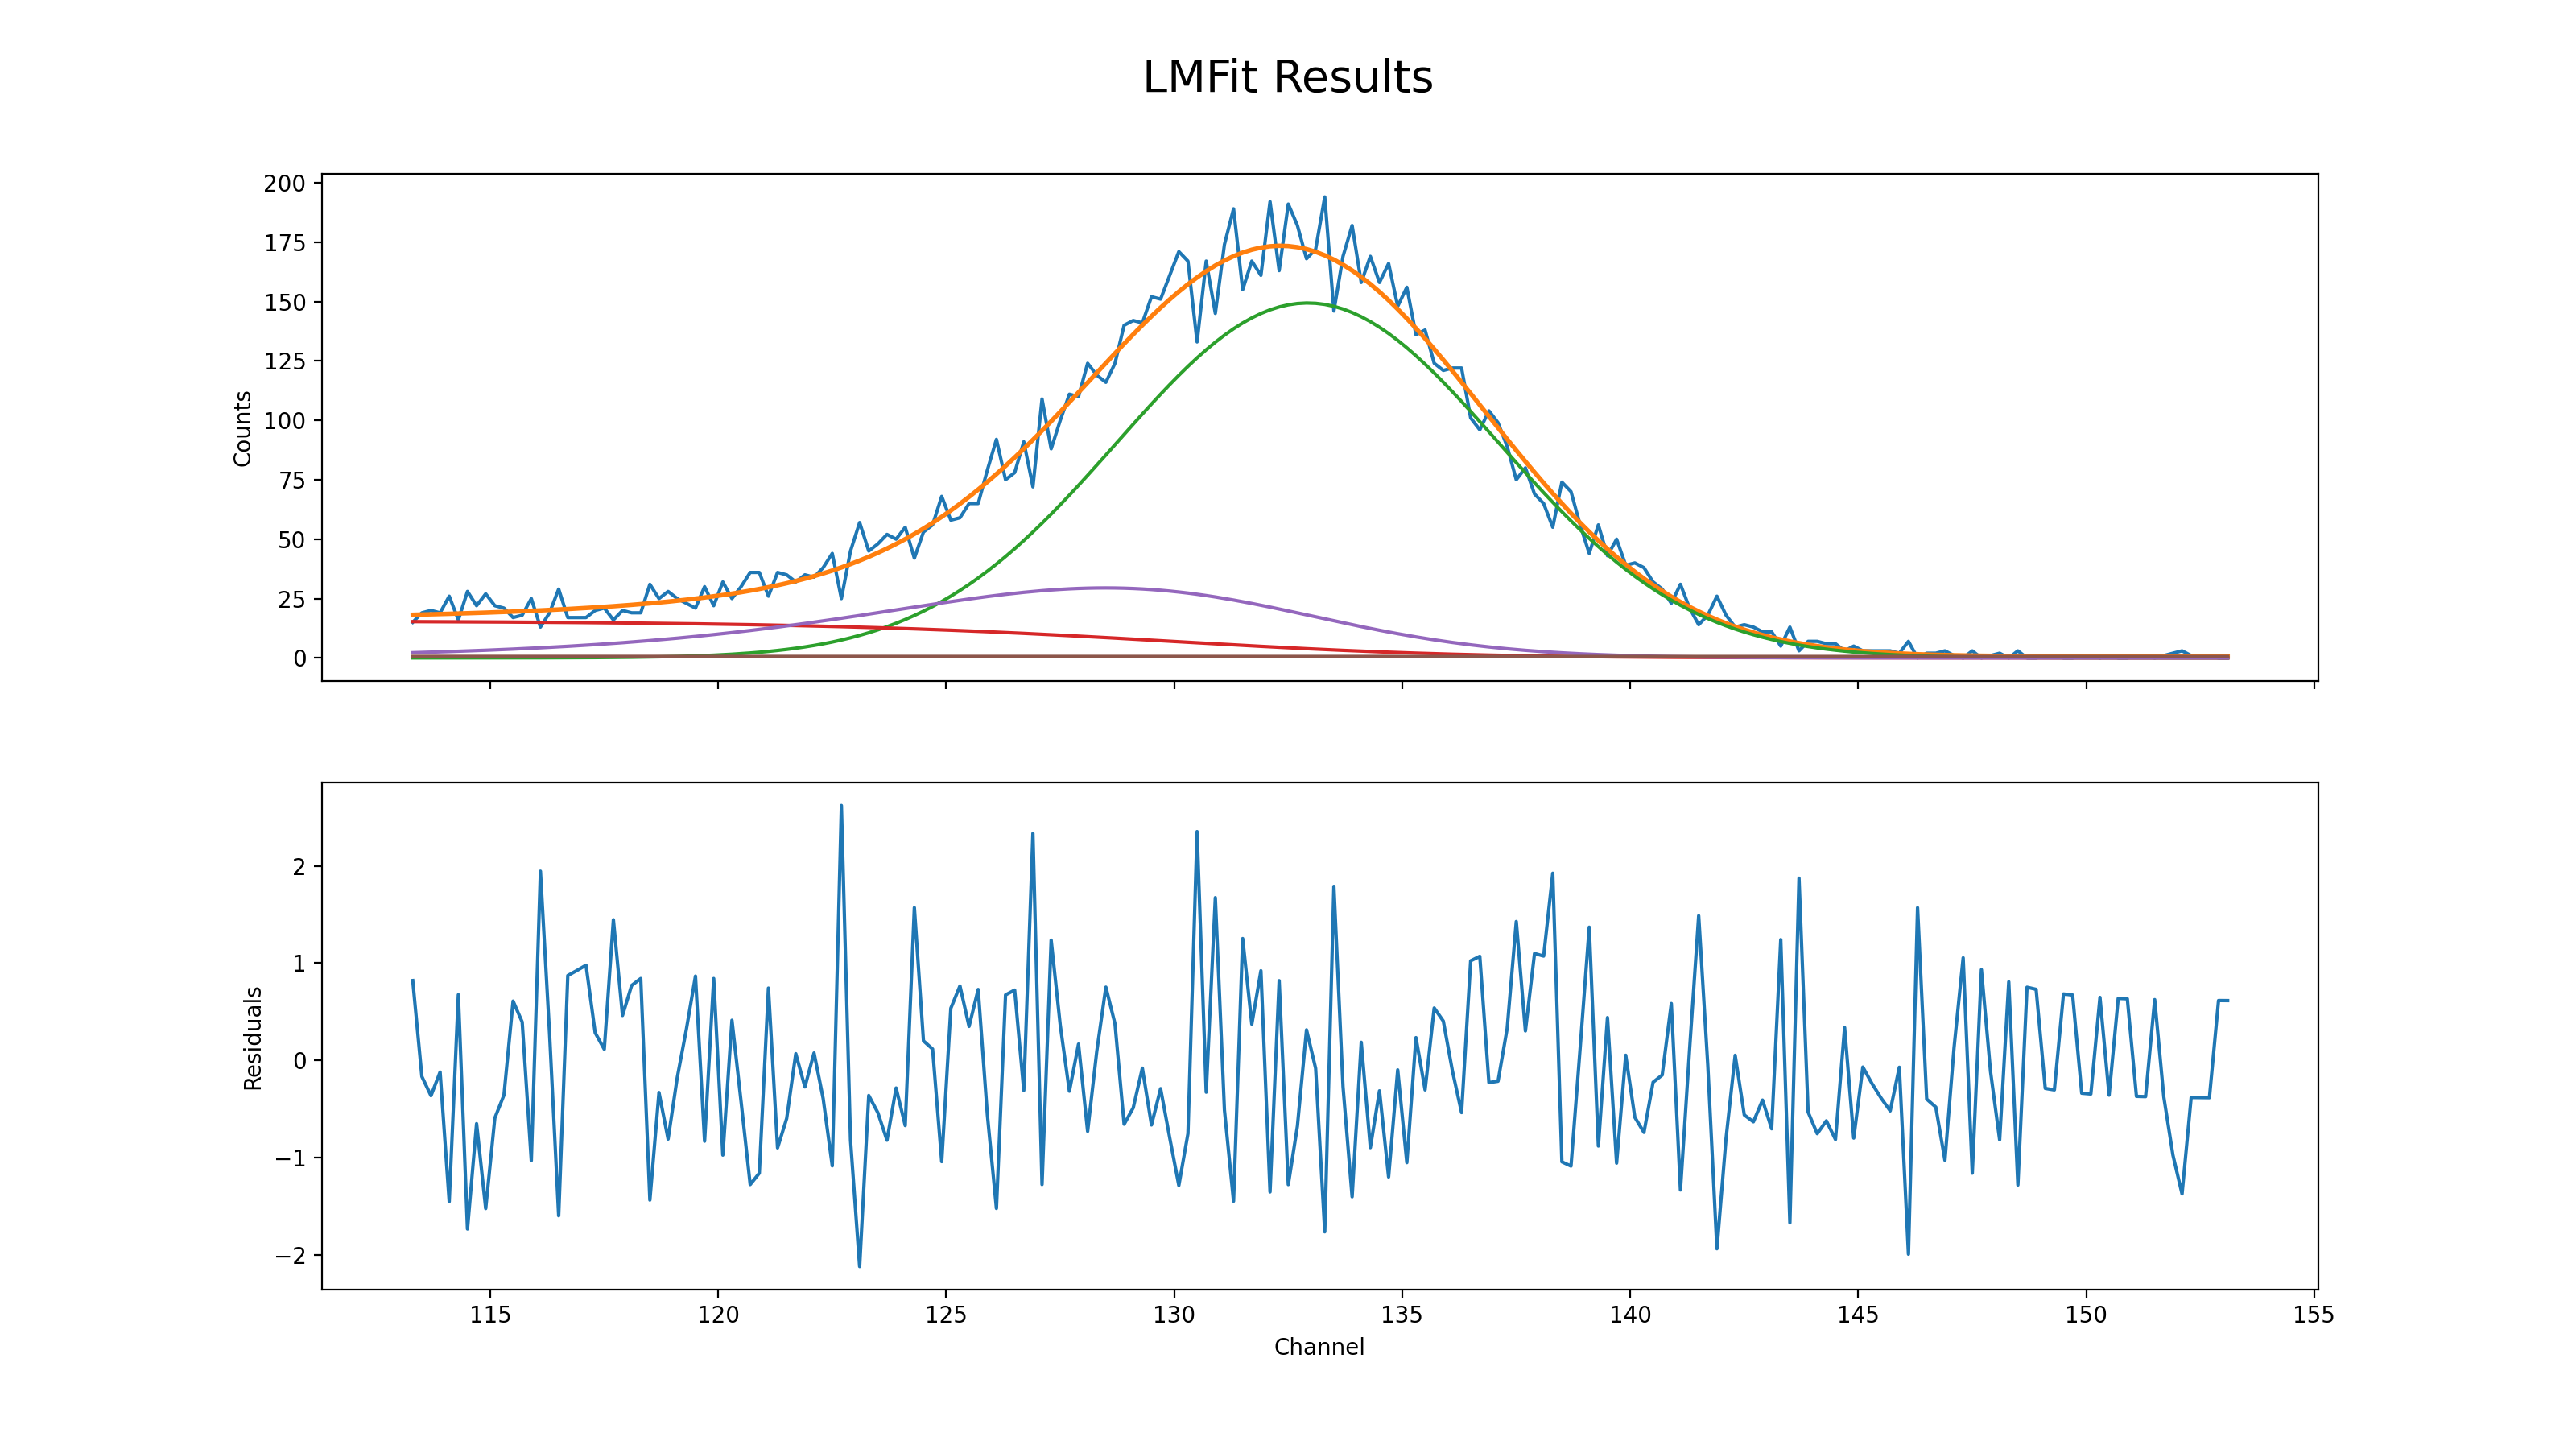

1
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
Fit succeeded.
[<Figure size 1600x900 with 2 Axes>]


([<lmfit.model.ModelResult at 0x1c3b4de50>,
 [[<Figure size 1600x900 with 2 Axes>],
  [<Figure size 1600x900 with 2 Axes>],
  [<Figure size 1600x900 with 2 Axes>]])

In [38]:
fitPeaks(scopeDict[V[0]][-1], 19, bins)